In [1]:
# Titanic Project Notebook

In [2]:
# 1. Load the data

import pandas as pd
# Load the Titanic dataset from the Downloads folder
train = pd.read_csv("train.csv")
print(train.head()) # Display the first 5 rows of the dataset

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
# 2. Data Cleaning

## Checking Blank Cells
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
## Handling Missing Values (Age)
train['Age'] = train['Age'].fillna(train['Age'].median())
print(train.isnull().sum()) # Check progress

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
## Drop the 'Cabin' column
train = train.drop(columns=['Cabin'])

In [6]:
## Quick Check of Columns
print(train.columns)  # Lists all column names

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [7]:
## Fill missing values in 'Embarked' with the mode
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

## Verify Cleaning
print(train.isnull().sum()) # Confirm there are no missing values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [8]:
## Checking Duplicate Rows
duplicates = train[train.duplicated()]
print(duplicates) # Displays duplicate rows
print(f"Number of duplicate rows: {duplicates.shape[0]}") # Shows the count of duplicates

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Embarked]
Index: []
Number of duplicate rows: 0


In [9]:
# 3. Explorartory Statistical Analysis

## Dataset Summary Using describe()
print(train.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [10]:
## Dataset Information Using info()
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None


In [11]:
## Frequency Counts Using value_counts()
print(train['Pclass'].value_counts()) # Check passenger class distribution
print(train['Embarked'].value_counts()) # Check embarkation port distribution

Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


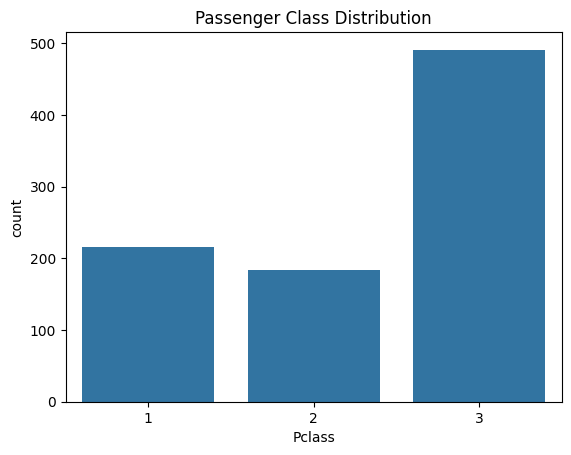

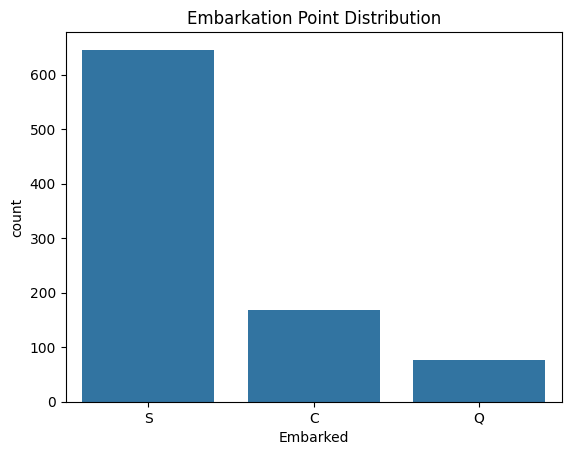

In [12]:
# 4. Visualizing Passenger Class and Embarkation Trends

import matplotlib.pyplot as plt
import seaborn as sns

## Passenger Class Distribution
sns.countplot(x='Pclass', data=train)
plt.title('Passenger Class Distribution')
plt.show()

## Embarkation Point Distribution
sns.countplot(x='Embarked', data=train)
plt.title('Embarkation Point Distribution')
plt.show()

In [13]:
## Calculate survival rates by embarkation point
survival_rates = train.groupby('Embarked')['Survived'].mean() * 100
print(survival_rates)

Embarked
C    55.357143
Q    38.961039
S    33.900929
Name: Survived, dtype: float64


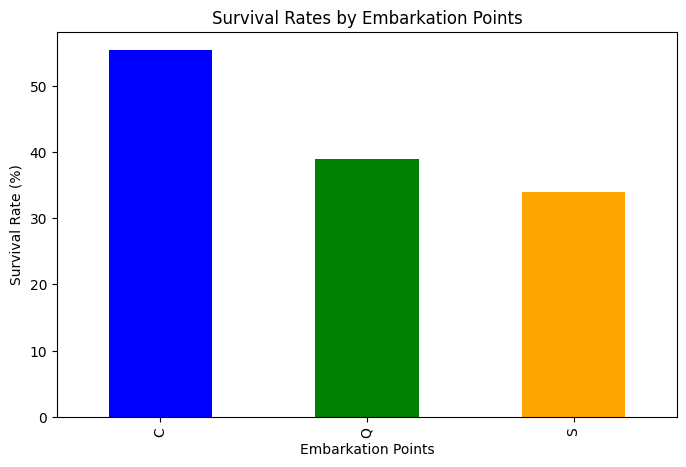

In [14]:
## Survival Rates by Embarkation Points
import seaborn as sns
import matplotlib.pyplot as plt

survival_rates.plot(kind='bar', color=['blue', 'green', 'orange'], figsize=(8, 5))
plt.title('Survival Rates by Embarkation Points')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Embarkation Points')
plt.show()

In [15]:
# 5. Feature Engineering

## Create FamilySize
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1  # Add 1 for self

In [16]:
## Create IsAlone
train['IsAlone'] = (train['FamilySize'] == 1).astype(int)

In [17]:
## Previewing the Dataset
print(train.head())  # Displays the first 5 rows

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  FamilySize  IsAlone  
0      0         A/5 21171   7.2500        S           2        0  
1      0          PC 17599  71.2833        C           2        0  
2      0  STON/O2. 3101282   7.9250        S           1        1  
3      0            113803  53.1000        S    

In [18]:
## Listiing Column Nnames in the Dataset
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'FamilySize', 'IsAlone'],
      dtype='object')


In [19]:
## Check FamilySize
print(train['FamilySize'].head())

## Check IsAlone
print(train['IsAlone'].value_counts())

0    2
1    2
2    1
3    2
4    1
Name: FamilySize, dtype: int64
IsAlone
1    537
0    354
Name: count, dtype: int64


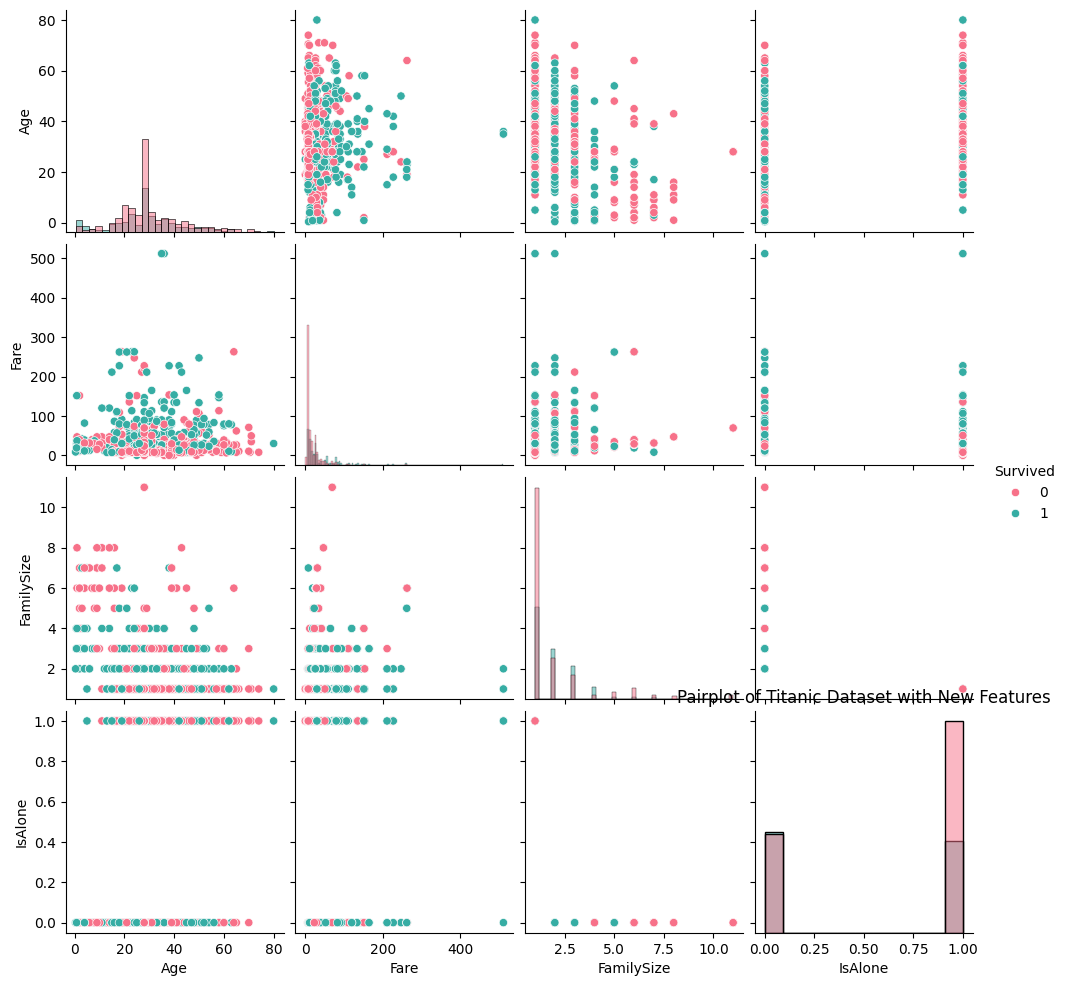

In [20]:
# 6. Exploring Relationships with Feaured Engineered Variables

import seaborn as sns
import matplotlib.pyplot as plt

## Pairplot including new features
sns.pairplot(train, vars=['Age', 'Fare', 'FamilySize', 'IsAlone'], hue='Survived', diag_kind='hist', palette='husl')
plt.title('Pairplot of Titanic Dataset with New Features')
plt.show()

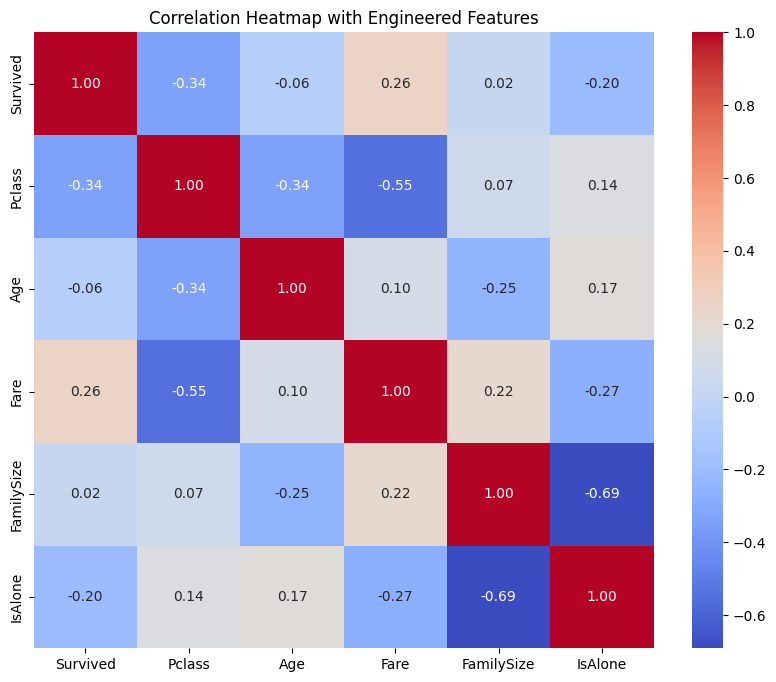

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

## Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(train[['Survived', 'Pclass', 'Age', 'Fare', 'FamilySize', 'IsAlone']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap with Engineered Features')
plt.show()

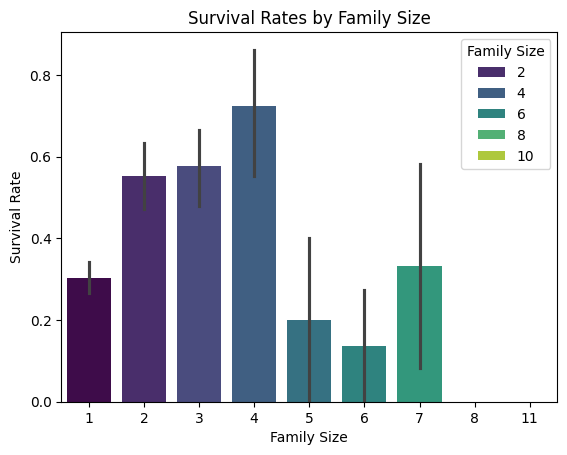

In [22]:
# 7. Exploring Survival Trends

import seaborn as sns
import matplotlib.pyplot as plt

## Analyzing Survival Rates by Family Size
sns.barplot(x='FamilySize', y='Survived', data=train, hue='FamilySize', palette='viridis')
plt.title('Survival Rates by Family Size')
plt.ylabel('Survival Rate')
plt.xlabel('Family Size')
plt.legend(title='Family Size')
plt.show()

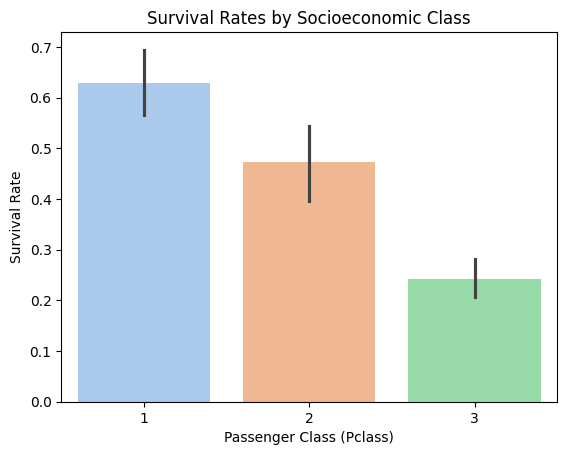

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

## Analyzing Survival Trends Across Socioeconomic Classes
sns.barplot(x='Pclass', y='Survived', data=train, hue='Pclass', palette='pastel', legend=False)
plt.title('Survival Rates by Socioeconomic Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class (Pclass)')
plt.show()

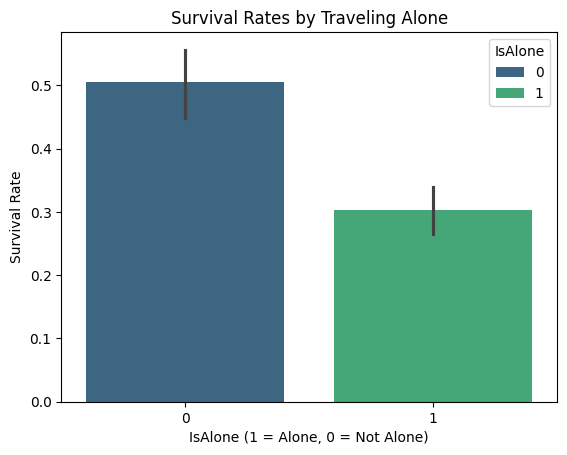

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

## Analysing IsAlone vs. Survival
sns.barplot(x='IsAlone', y='Survived', data=train, hue='IsAlone', palette='viridis')
plt.title('Survival Rates by Traveling Alone')
plt.ylabel('Survival Rate')
plt.xlabel('IsAlone (1 = Alone, 0 = Not Alone)')
plt.legend(title='IsAlone')  # Optional legend for clarity
plt.show()

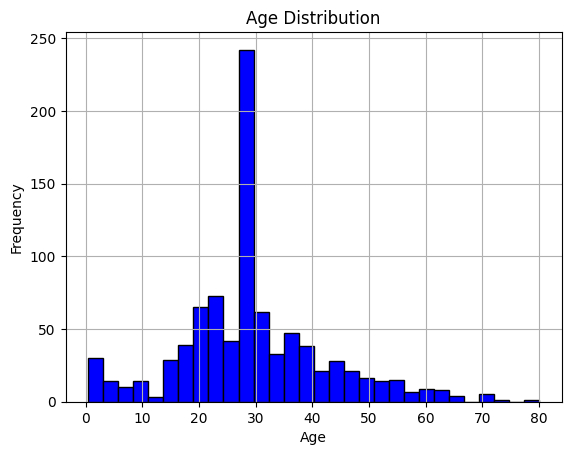

In [25]:
# 8. Exploring Passenger Demographics and Fare Trends

import seaborn as sns
import matplotlib.pyplot as plt

## Visualizing Age Distribution of Titanic Passengers
train['Age'].hist(bins=30, color='blue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

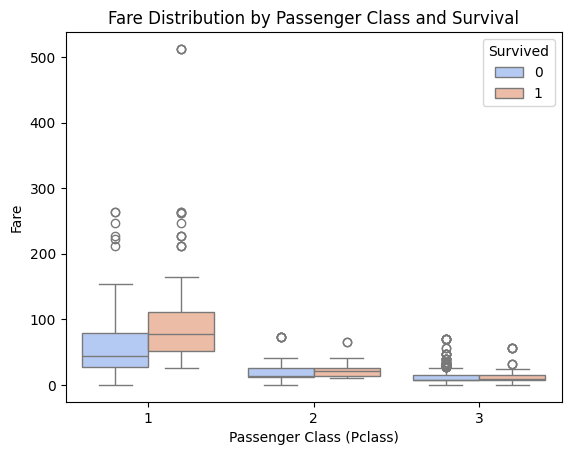

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

## Analyzing Fare Distribution
sns.boxplot(x='Pclass', y='Fare', data=train, hue='Survived', palette='coolwarm')
plt.title('Fare Distribution by Passenger Class and Survival')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Fare')
plt.show()

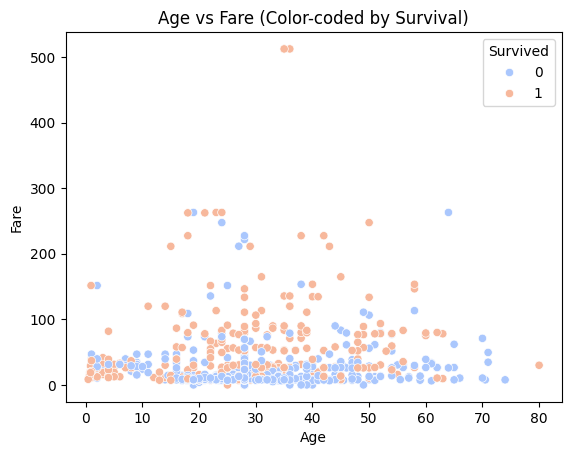

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

## Relationship Between Age and Fare by Survival Status
sns.scatterplot(x='Age', y='Fare', data=train, hue='Survived', palette='coolwarm')
plt.title('Age vs Fare (Color-coded by Survival)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [28]:
# 9. Applying Label Encoding to Categorical Data

from sklearn.preprocessing import LabelEncoder

## Sample data
data = {'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red']}
df = pd.DataFrame(data)

## Apply label encoding
encoder = LabelEncoder()
df['Color_encoded'] = encoder.fit_transform(df['Color'])

print(df)

   Color  Color_encoded
0    Red              2
1   Blue              0
2  Green              1
3   Blue              0
4    Red              2


In [ ]:
# 10. Final Insights and Next Steps

The Titanic dataset analysis provided valuable insights into how passenger demographics, socioeconomic status, and travel patterns influenced survival rates. 
Key findings include:
- Passengers in first class had significantly higher survival chances.
- Smaller families were more likely to survive compared to solo travelers.
- Embarkation points revealed distinct trends in survival rates.

This exploratory analysis has laid a solid foundation for further study. Potential next steps could include:
1. Building predictive models to quantify survival probabilities.
2. Investigating additional datasets to validate findings across different contexts.
3. Enhancing visual storytelling techniques for more impactful presentations.

Thank you for following along on this analytical journey!